# Final Project

This dataset was taken from Kaggle, and it includes two csv files of US census data from 2015 and 2017. The data set is made of 74,000 rows and 35 columns of census data by census tract, which means statistical subdivisions of a county, per state. We will be trying to answer questions related to this dataset and see if we can find any interesting things out, or predict some factors.

We will start out by cleaning up the data in both of our tables

Questions: 
1. Is it possible to predict, based on the poverty ratings of a county or census tract, which county will be most likely to increase or decrease their poverty ratings?
2. Do counties with private work and public work have a higher or lower income across time?
3. Is it possible to predict which county will improve their income per capita from 2015 to 2017 based on other statistics in the data set? This could include employment, transit, private or public sector statistics in the data set.
4. Is it possible to predict an increase or decrease in unemployment based on private and public work available by county or by any other measures?

#### Census data 2015

In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Below we performed data cleaning by removing columns that included the ID's of the counties subdivisions.

In [58]:
census_2015 = pd.read_csv(r"C:\Users\valde\Downloads\2015CensusData.csv")
census_2015 = census_2015.drop(columns = ['CensusTract'], axis = 1)
census_2015.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,0.6,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,1.4,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,0.0,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,3.8,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


#### Census data 2017

In [7]:
census_2017 = pd.read_csv(r"C:\Users\valde\Downloads\2017CensusData.csv")
census_2017 = census_2017.drop(columns = ['TractId'], axis = 1)
census_2017.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


#### 1. Is it possible to predict, based on the poverty ratings of a county or census tract, which county will be most likely to increase or decrease their poverty ratings?

To perform the operations that we did below we first had to start by reorganizing the data frame to include only the columns that we though would affect poverty ratings. We used groupby method to eliminate the repeat rows of counties and used the mean function to average all the values from the county subdivisions into the three columns below. In doing so we have the averages for each county in each state. 

In [62]:
state_county_2015 = census_2015.groupby(by=['State', 'County', 'Poverty', 'IncomePerCap', 'Unemployment', 'Hispanic','White',
                                            'Black','Native','Asian'], axis=0).sum()
state_county_2015 = state_county_2015[['TotalPop']].reset_index()
state_county_2015 = census_2015.groupby(['State', 'County'], as_index=False).mean()[['State', 'County', 'Poverty', 'IncomePerCap', 'Unemployment']]
state_county_2015 = state_county_2015.round({'Poverty': 1, 'IncomePerCap': 1, 'Unemployment': 1})
state_county_2015.head()

,State,County,Poverty,IncomePerCap,Unemployment
0,Alabama,Autauga,14.1,24386.9,8.2
1,Alabama,Baldwin,14.4,26842.8,8.2
2,Alabama,Barbour,26.8,17104.6,15.8
3,Alabama,Bibb,15.6,18807.0,9.5
4,Alabama,Blount,17.3,20171.3,7.7


Our next step in prediction was to see if there was any correlation in the values in the column, with our target variable, poverty ratings. In looking up how to do linear regression we found that one of the first steps was to see if there's a strong relationship between our independent variables and our target variable. To do this we used a correlation matrix to see what values correlate with each other. The values that most strongly correlate withg poverty are unemployment and income per cap. We decided to go with income per cap since it was the closest to 1. From the matrix, we gathered that as income per cap increased poverty decreased.

<AxesSubplot:>

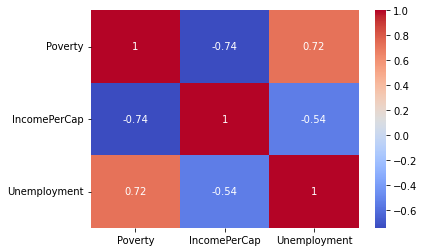

In [176]:
corr_matrix = state_county_2015.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Below we plotted a scatterplot with a regression line. To get to that we first had to reshape our x variable to a 2-dimensional array so that we could properly use the fit and predict models. We then used the .fit() method to train the model on our training data so that we can use other methods like predict. After we used .predict() to predict poverty rates based on our training data or X which is the income per cap. We then plotted the data and used a linear regression line to show the trend of the data.

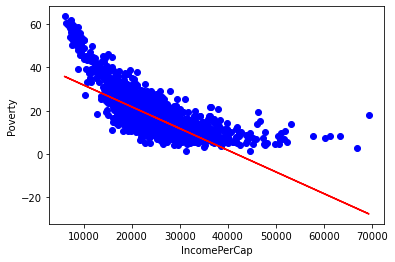

In [170]:
X = state_county_2015['IncomePerCap'].values.reshape(-1, 1)
y = state_county_2015['Poverty'].values

model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('IncomePerCap')
plt.ylabel('Poverty')
plt.show()

In [186]:
X = state_county_2015['IncomePerCap'].values.reshape(-1, 1)
y = state_county_2015['Poverty'].values

model.fit(X, y)

new_X = [[10000], [20000], [30000], [40000], [50000], [60000]] 
new_y_pred = model.predict(new_X)

print(new_y_pred)

[ 31.8381404   21.81263951  11.78713861   1.76163772  -8.26386317
 -18.28936407]


Based on the model predictions we can see that as the income per capita increases then poverty decreases as well. After 50,000 the poverty rates go into the negatives which leads us to believe that  counties with a higher average of Income per capita tends to have low poverty.

#### 4. Is it possible to predict unemployment based on any of the values given in the table? 

Just like the table above we had to remove some columns and groupby state and county to get the averages for the county values. We included what we thought would affect unemployment rates in this table. Since there are so many factors in this table that could affect unemployment we decided to go with these and see if they made an impact.

In [163]:
new_2017 = census_2017.groupby(by=['State', 'County'], axis=0).mean()
new_2017 = new_2017.reset_index()[['State', 'County', 'Income', 'Poverty','ChildPoverty', 'Employed', 'Unemployment', 'TotalPop']]
new_2017 = new_2017.round({'Income':1,'Poverty':1,'ChildPoverty':1,'Employed':1,'Unemployment':1})
new_2017.drop('TotalPop', axis=1, inplace=True)
new_2017.head()

,State,County,Income,Poverty,ChildPoverty,Employed,Unemployment
0,Alabama,Autauga County,53567.5,14.6,21.7,2009.3,6.0
1,Alabama,Baldwin County,52732.2,12.9,17.3,2797.7,6.2
2,Alabama,Barbour County,32717.8,27.8,46.5,986.4,11.9
3,Alabama,Bibb County,44677.0,13.9,23.4,2042.8,8.8
4,Alabama,Blount County,46325.6,16.4,26.3,2375.6,4.8


This is our heatmap to see the strength of the correlations between the values in the table so we could see which one was strongest. After looking at all of them, we came the conclusion that the strongest correlation between our independent and dependent variable was unemployment and poverty, so we chose to use those variables for our training dataset.

<AxesSubplot:>

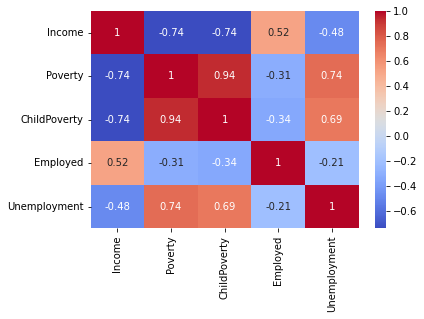

In [164]:
corr_matrix2 = new_2017.corr()
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')

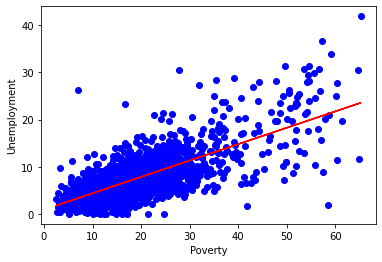

In [179]:
X = new_2017['Poverty'].values.reshape(-1, 1)
y = new_2017['Unemployment'].values

model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Poverty')
plt.ylabel('Unemployment')
plt.show()

Below are the predicted unemployment rates based on the poverty rates used in the new_x variable. 

In [183]:
X = new_2017['Poverty'].values.reshape(-1, 1)
y = new_2017['Unemployment'].values

model.fit(X, y)

new_X = [[10], [20], [30], [40], [50]] 
new_y_pred = model.predict(new_X)

print(new_y_pred)

[ 4.37953208  7.85015733 11.32078258 14.79140783 18.26203308]
